# Data Preprocessing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/final.csv')
df.pop("Unnamed: 0") #removes specified column from dataframe
df = df.set_index("Date") #setting index of data frame
df = df.dropna(axis=1,how='all') #drops rows which have null values
df2 = df['0111145D UN Equity'] 
df2 = df2.dropna()
df2.reset_index(drop = True)
#df = df.drop('0111145D UN Equity', axis=1)


0        23.4375
1        23.2500
2        22.6250
3        22.3750
4        22.0000
          ...   
19594    55.6400
19595    55.8000
19596    55.5800
19597    54.5700
19598    54.8400
Name: 0111145D UN Equity, Length: 19599, dtype: float64

In [3]:
print(df2.shape)  #gives dimensions of the data frame

(19599,)


In [4]:
print(int((len(df2)*0.9)))

17639


# Train Test Data & Split

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1)) #transforms each feature individually into the range 0 to 1.
df2 = scaler.fit_transform(np.array(df2).reshape(-1, 1)) #number of rows are unknown but the number of columns is 1. ths function reshapes the array

train_size = int(len(df2)*0.9)  # 90% of df2 is given as training data
test_size = len(df2) - train_size  #remaining 10% is the testing data
train_data = df2[0:train_size, :]
test_data = df2[train_size : len(df2), :1]

def create_2d_dataset(dataset, time_step):  #for making dataset values into a matrix
    Xdata, Ydata = [], []
    for i in range(len(dataset)-time_step-1):
        record = dataset[i:(i+time_step), 0]
        Xdata.append(record)
        Ydata.append(dataset[i+time_step, 0])
    return np.array(Xdata), np.array(Ydata)

In [6]:
time_step = 100
X_train, y_train = create_2d_dataset(train_data, time_step)
X_test, y_test = create_2d_dataset(test_data, time_step)

In [7]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [8]:
print((X_test))

[[[0.62836491]
  [0.60468594]
  [0.61390828]
  ...
  [0.56380857]
  [0.55608175]
  [0.55358923]]

 [[0.60468594]
  [0.61390828]
  [0.60244267]
  ...
  [0.55608175]
  [0.55358923]
  [0.57377866]]

 [[0.61390828]
  [0.60244267]
  [0.59895314]
  ...
  [0.55358923]
  [0.57377866]
  [0.57103689]]

 ...

 [[0.94167498]
  [0.93220339]
  [0.93594217]
  ...
  [0.95314058]
  [0.94242273]
  [0.95064806]]

 [[0.93220339]
  [0.93594217]
  [0.94491525]
  ...
  [0.94242273]
  [0.95064806]
  [0.95463609]]

 [[0.93594217]
  [0.94491525]
  [0.95962114]
  ...
  [0.95064806]
  [0.95463609]
  [0.94915254]]]


In [9]:
print(X_train.shape)
print(X_test.shape)

(17538, 100, 1)
(1859, 100, 1)


# Model Creation

In [10]:
import tensorflow as tf

In [11]:
model = tf.keras.Sequential([    #sequential refers to a model that forms a cluster of layers that is stacked linearly
                    tf.keras.layers.LSTM(50, input_shape=(100, 1)),
                     tf.keras.layers.Dense(32, activation=tf.nn.relu),
                    tf.keras.layers.Dense(16, activation=tf.nn.relu), #Implements a dense NN # layer1
                    tf.keras.layers.Dense(8, activation=tf.nn.relu), #layer2
                    tf.keras.layers.Dense(1) #layer3
                    
])
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 32)                1632      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


A **Dense Neutral Network** Layer is a layer that is deeply connected with its preceding layer which means the neurons of the layer are connected to every neuron of its preceding layer.

In [ ]:
help(tf.keras.layers.LSTM)

In [13]:
Summary = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20, batch_size = 100, verbose = 2)

Epoch 1/20
176/176 - 8s - loss: 0.0064 - val_loss: 0.0011 - 8s/epoch - 44ms/step
Epoch 2/20
176/176 - 1s - loss: 5.0413e-04 - val_loss: 0.0011 - 1s/epoch - 6ms/step
Epoch 3/20
176/176 - 1s - loss: 4.2088e-04 - val_loss: 0.0010 - 1s/epoch - 6ms/step
Epoch 4/20
176/176 - 1s - loss: 3.8709e-04 - val_loss: 0.0011 - 1s/epoch - 6ms/step
Epoch 5/20
176/176 - 1s - loss: 3.6804e-04 - val_loss: 9.2248e-04 - 1s/epoch - 6ms/step
Epoch 6/20
176/176 - 1s - loss: 3.3129e-04 - val_loss: 0.0011 - 1s/epoch - 7ms/step
Epoch 7/20
176/176 - 1s - loss: 3.3474e-04 - val_loss: 7.3513e-04 - 1s/epoch - 6ms/step
Epoch 8/20
176/176 - 1s - loss: 3.1065e-04 - val_loss: 5.0890e-04 - 1s/epoch - 6ms/step
Epoch 9/20
176/176 - 1s - loss: 3.0455e-04 - val_loss: 5.8621e-04 - 1s/epoch - 6ms/step
Epoch 10/20
176/176 - 1s - loss: 3.0980e-04 - val_loss: 4.8685e-04 - 1s/epoch - 6ms/step
Epoch 11/20
176/176 - 1s - loss: 2.9716e-04 - val_loss: 4.9834e-04 - 1s/epoch - 6ms/step
Epoch 12/20
176/176 - 1s - loss: 3.0171e-04 - val_los

An epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed. By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.

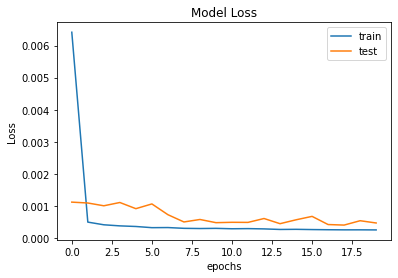

In [14]:
plt.plot(Summary.history['loss'])
plt.plot(Summary.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

In [15]:
print(X_train.shape)
print(X_test.shape)

(17538, 100, 1)
(1859, 100, 1)


In [16]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

59/59 [==============================] - 0s 3ms/step


 A model can be created and fitted with trained data, and used to make a 
prediction

In [17]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Model Results & Plots

In [18]:
from sklearn.metrics import mean_squared_error
testScore = np.sqrt(mean_squared_error(y_test, test_predict))

In [19]:
lookback = 100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[lookback:len(test_predict)+lookback, :] = test_predict

testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + lookback*2 + 1: len(df2)-1, :] = test_predict


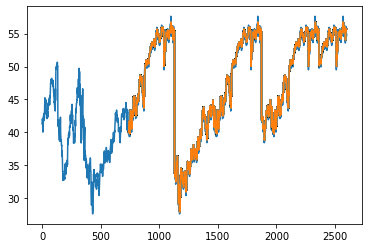

In [20]:
plt.plot((scaler.inverse_transform(df2))[17000:19599, :])
plt.plot(testPredictPlot[17000:19599, :])
plt.show()